In [1]:
import os
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
data=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',
                            extract=True,origin=url)
path=os.path.join(os.path.dirname(data),'cats_and_dogs_filtered')
print(path)
train_dir=os.path.join(path,'train')
val_dir=os.path.join(path,'validation')
test_dir=os.path.join(path,'test')
print(train_dir)
print(val_dir)
print(test_dir)

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/test


In [3]:
#load a data
BATCH_SIZE=8
IMG_SIZE=(160,160)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


(8, 160, 160, 3)
(8,)
tf.Tensor([0 0 1 1 0 1 1 0], shape=(8,), dtype=int32)


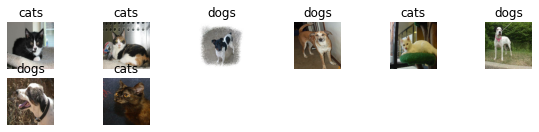

In [5]:
# a single batch
# visualize
plt.figure(figsize=(10,6))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(6,6 ,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

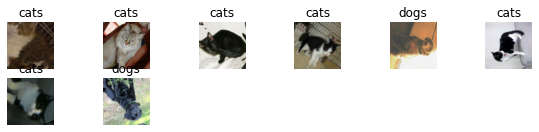

In [6]:
# Data augmentation 
data_aug=tf.keras.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    #tf.keras.layers.experimental.preprocessing.Randomcrop(100,100),
    # Random tranlate, random height, Random width
])
plt.figure(figsize=(10,6))
for image_batch,label_batch in train_ds.take(1):
    aug_img=data_aug(image_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(6,6,i+1)
        plt.imshow(aug_img[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [7]:
train_batches=tf.data.experimental.cardinality(train_ds)
print('Training Batch=', train_batches.numpy())

Training Batch= 250


(299, 299, 3)
(1, 299, 299, 3)


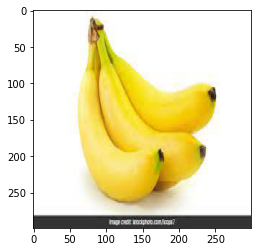

In [8]:
#  Project 1   Transfer learning as it is
import tensorflow as tf
dir='/content/drive/MyDrive/CAT_DOG_DATASET/banana.jfif'
image=tf.keras.preprocessing.image.load_img(dir,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(image)
print(img.shape)
plt.imshow(img/255)
img1=tf.expand_dims(img,axis=0)
print(img1.shape)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [11]:
y=model.predict(img1)
label=tf.keras.applications.mobilenet.decode_predictions(y)
print(label)

ValueError: ignored

In [ ]:
  img2=tf.keras.applications.mobilenet.preprocess_input(img1)
  y=model.predict(img2)
  label=tf.keras.applications.mobilenet.decode_predictions(y)
  print(label)

In [12]:
model=tf.keras.applications.inception_v3.InceptionV3()
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [13]:
img2=tf.keras.applications.inception_v3.preprocess_input(img1)
y=model.predict(img2)
label=tf.keras.applications.inception_v3.decode_predictions(y)
print(label)

[[('n07753592', 'banana', 0.84954286), ('n07749582', 'lemon', 0.0057960064), ('n07720875', 'bell_pepper', 0.005471584), ('n07753275', 'pineapple', 0.004285108), ('n07716906', 'spaghetti_squash', 0.004201323)]]
